<a href="https://colab.research.google.com/github/ashutoshrana171/bins/blob/master/Mean_Reversion_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
# Description: Mean reversion trading strategy

In [226]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data
from google.colab import files
files.upload()

In [228]:
#Read the data from file
df = pd.read_csv('BRK-B.csv')

#Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#remove the date column
df.drop(['Date'], inplace = True, axis = 1)
#Display data
df

,Open,High,Low,Close,Adj Close,Volume
2020-01-02,227.509995,228.389999,226.710007,228.389999,228.389999,3764000
2020-01-03,225.690002,227.429993,225.479996,226.179993,226.179993,3023900
2020-01-06,224.990005,227.130005,224.699997,226.990005,226.990005,4263000
2020-01-07,227.259995,227.259995,225.440002,225.919998,225.919998,3517000
2020-01-08,226.029999,227.839996,225.869995,225.990005,225.990005,3780300
...,...,...,...,...,...,...
2022-09-09,284.540009,287.019989,284.130005,285.769989,285.769989,3125100
2022-09-12,286.700012,289.239990,286.029999,288.510010,288.510010,3407900
2022-09-13,283.989990,285.140015,277.500000,278.290009,278.290009,4582700
2022-09-14,279.000000,280.209991,275.640015,278.420013,278.420013,3718400


In [229]:
#Create a function for simple moving average
def SMA(data, period=20, column='Close'):
  return data[column].rolling(window=period).mean()

In [230]:
#Building the data set
df['SMA'] = SMA(df,20)

#simple returns i.e. percentage change between Ti - T(i+1)
df['Simple_Returns'] = df.pct_change(1)['Close']

#Logarithmic returns
df['Logarithmic_Returns'] = np.log(1+df['Simple_Returns'])

#Ratios
df['Ratios'] = df['Close'] / df['SMA']

#display data
df

,Open,High,Low,Close,Adj Close,Volume,SMA,Simple_Returns,Logarithmic_Returns,Ratios
2020-01-02,227.509995,228.389999,226.710007,228.389999,228.389999,3764000,NaN,NaN,NaN,NaN
2020-01-03,225.690002,227.429993,225.479996,226.179993,226.179993,3023900,NaN,-0.009676,-0.009724,NaN
2020-01-06,224.990005,227.130005,224.699997,226.990005,226.990005,4263000,NaN,0.003581,0.003575,NaN
2020-01-07,227.259995,227.259995,225.440002,225.919998,225.919998,3517000,NaN,-0.004714,-0.004725,NaN
2020-01-08,226.029999,227.839996,225.869995,225.990005,225.990005,3780300,NaN,0.000310,0.000310,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-09-09,284.540009,287.019989,284.130005,285.769989,285.769989,3125100,290.864499,0.008576,0.008540,0.982485
2022-09-12,286.700012,289.239990,286.029999,288.510010,288.510010,3407900,290.212500,0.009588,0.009543,0.994134
2022-09-13,283.989990,285.140015,277.500000,278.290009,278.290009,4582700,288.986000,-0.035423,-0.036066,0.962988
2022-09-14,279.000000,280.209991,275.640015,278.420013,278.420013,3718400,287.574501,0.000467,0.000467,0.968167


In [231]:
df['Ratios'].describe()

count    663.000000
mean       1.003487
std        0.037964
min        0.825704
25%        0.983145
50%        1.004941
75%        1.027301
max        1.115097
Name: Ratios, dtype: float64

In [232]:
#Get percentile values
percentiles = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]

#remove NAN values from ratio column
ratios = df['Ratios'].dropna()

#get percentile values
percentiles_values = np.percentile(ratios,percentiles)

#display percentiles
percentiles_values

array([0.94116563, 0.9572012 , 0.97023311, 0.97821507, 0.98314516,
       0.98834473, 0.99427757, 0.99932989, 1.00171395, 1.0049411 ,
       1.0083143 , 1.01321126, 1.01902329, 1.02284455, 1.02730062,
       1.032911  , 1.03789587, 1.04768313])

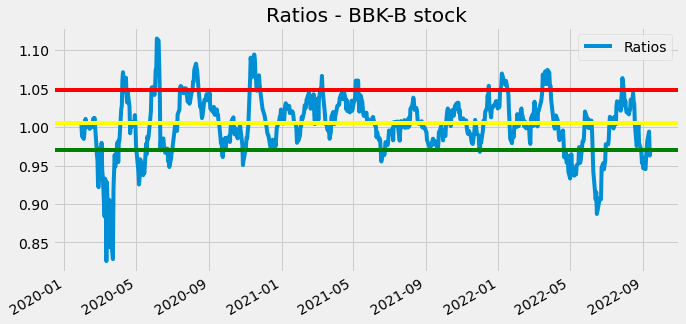

In [240]:
#Plotting the ratios
plt.figure(figsize=(10,5))
plt.title('Ratios - BBK-B stock')
df['Ratios'].dropna().plot(legend=True)

#plotting the percentiles to get the idea of buy and sell
plt.axhline(percentiles_values[2], c='green', label = '15th Percentile')
plt.axhline(percentiles_values[9], c='yellow', label = '50th Percentile')
plt.axhline(percentiles_values[-1], c='red', label = '85th Percentile')


In [245]:
#Create buy and sell signals
sell = percentiles_values[-1] #90th percentile threshold where we want to sell
buy = percentiles_values[2] #15th percentile threshold where we want to buy

#-1 where ratio is greater than the sell percentile and nan otherwise
df['Positions'] = np.where(df.Ratios > sell, -1, np.nan)

#1 where ratio is less than the buy percentile and current value otherwise
df['Positions'] = np.where(df.Ratios < buy, 1, df['Positions'])

#function ffill to fill missing values in the data frame. (ffill->forward fill)
df['Positions'] = df['Positions'].ffill()

#to get buy and sell signals
df['Buy'] = np.where(df.Positions == 1, df['Close'], np.nan)
df['Sell'] = np.where(df.Positions == -1, df['Close'], np.nan)

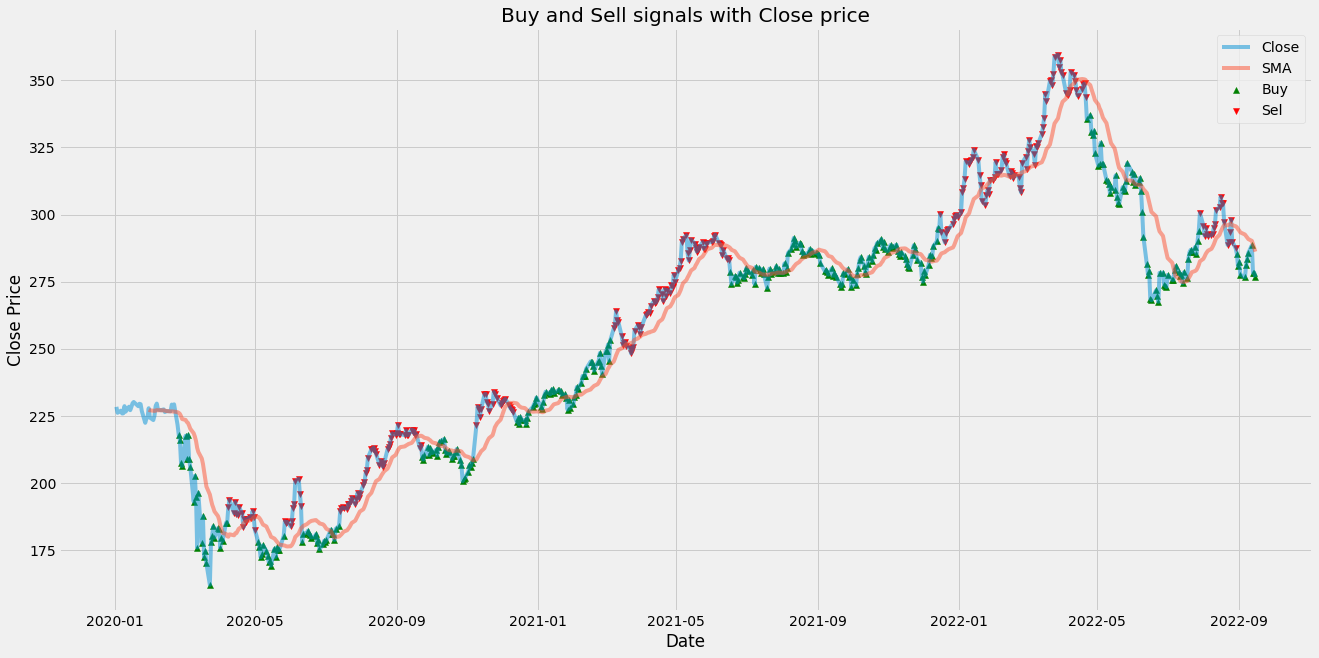

In [246]:
#Plot buy and sell signals along with close price
plt.figure(figsize = (20,10))
plt.title('Buy and Sell signals with Close price')
plt.plot(df['Close'], alpha = 0.5, label = 'Close')
plt.plot(df['SMA'], alpha= 0.5, label = 'SMA')
plt.scatter(df.index, df['Buy'], color = 'green', label = 'Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell'], color = 'red', label = 'Sel', marker='v', alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [247]:
#calculate returns for the strategy
df['Strategy_Returns'] = df.Positions.shift(1)*df.Logarithmic_Returns
df['Strategy_Returns']

2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2022-09-09    0.008540
2022-09-12    0.009543
2022-09-13   -0.036066
2022-09-14    0.000467
2022-09-15   -0.006197
Name: Strategy_Returns, Length: 682, dtype: float64

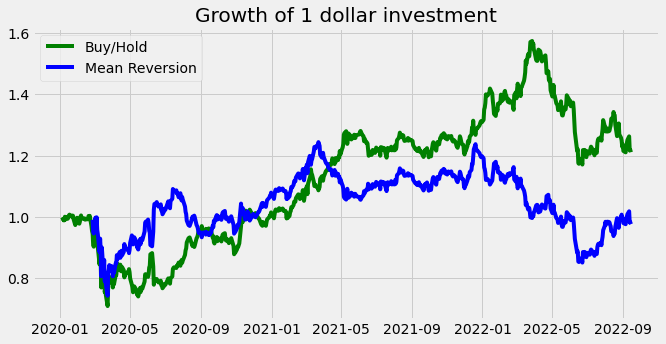

In [248]:
#plot log returns and mean reversion strategy
plt.figure(figsize=(10,5))
plt.title('Growth of 1 dollar investment')
plt.plot(np.exp(df['Logarithmic_Returns'].dropna()).cumprod(), c='green', label='Buy/Hold')
plt.plot(np.exp(df['Strategy_Returns'].dropna()).cumprod(), c='blue', label='Mean Reversion')
plt.legend()

In [249]:
print('Buy and Hold', np.exp(df['Logarithmic_Returns'].dropna()).cumprod()[-1] - 1)
print('Mean Reversion', np.exp(df['Strategy_Returns'].dropna()).cumprod()[-1] - 1)


Buy and Hold 0.2115242051382502
Mean Reversion -0.022880946329531637
